In [340]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from subprocess import call

In [341]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [342]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [343]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [344]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [345]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,1


Now, we do the same to the "Embarked" column.

In [346]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


Select relevant variables from the data and split the data into a training, development, and test set.

In [347]:
# Select relevant features columns
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
# Select relevant target column
target = 'Survived'
# Fill missing values in 'Age' column with median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
# Define X and labels y
X = titanic_df[features]
# Define y
y = titanic_df[target]
# Split the original data set into 80% training and 20% test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Split the training set further into 80% training and 20% development sets
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
# Display the shapes of the resulting sets
X_train.shape, X_dev.shape, X_test.shape

((569, 10), (143, 10), (179, 10))

Train a decision tree and make a plot of it.

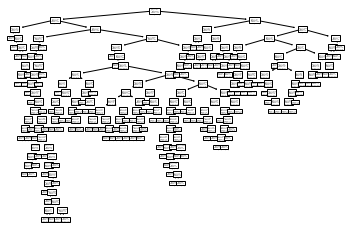

In [348]:
# Train Decision Tree with no max depth restriction
decision_tree = DecisionTreeClassifier(max_depth=None, random_state=42)
# Fit Decision Tree model to the training data
decision_tree.fit(X_train, y_train)
# Use Graphviz if installed to display a high-resolution image
graphviz_installed = False
# Plot and export the decision tree
if (graphviz_installed):
  export_graphviz(decision_tree, out_file='decision_tree.dot', X = titanic_df.features)  
  # Convert to png using system command
  call(['dot', '-Tpng', 'decision_tree.dot', '-o', 'decision_tree.png', '-Gdpi=600'])
# Display the decision tree using matplotlib
else: 
  # Create a figure to plot the decision tree
  fig = plt.figure()
  # Plot the decision tree
  tree.plot_tree(decision_tree)
  # Export the decision tree to a png file
  fig.savefig('decision_tree.png')

Compute your model’s accuracy on the development set. Try building your model with different values of the max_depth [2-10]. At each step, create a plot of your tree and store the accuracies on both the training and development data.

([0.7996485061511424,
  0.8330404217926186,
  0.8383128295254832,
  0.8558875219683656,
  0.8787346221441125,
  0.8927943760984183,
  0.9068541300527241,
  0.9191564147627417,
  0.9261862917398945],
 [0.8181818181818182,
  0.8321678321678322,
  0.8321678321678322,
  0.8181818181818182,
  0.7832167832167832,
  0.8321678321678322,
  0.8321678321678322,
  0.8321678321678322,
  0.8251748251748252])

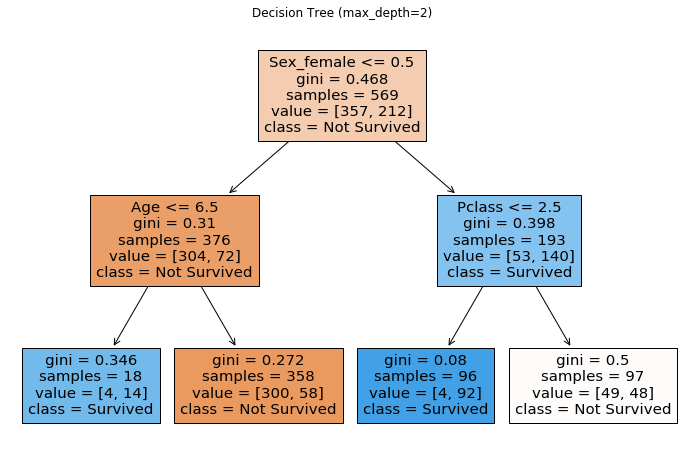

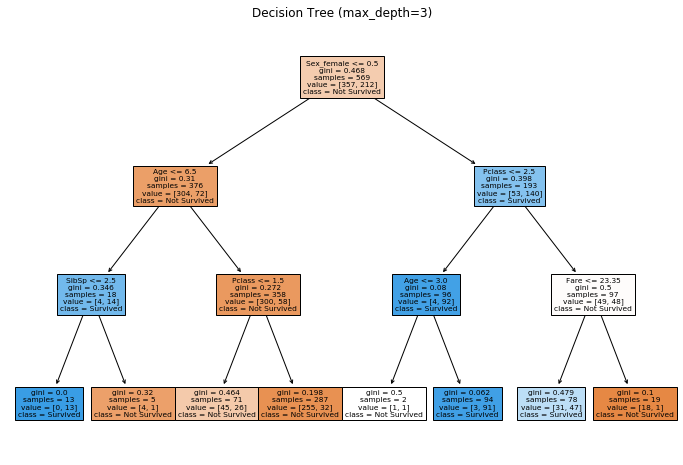

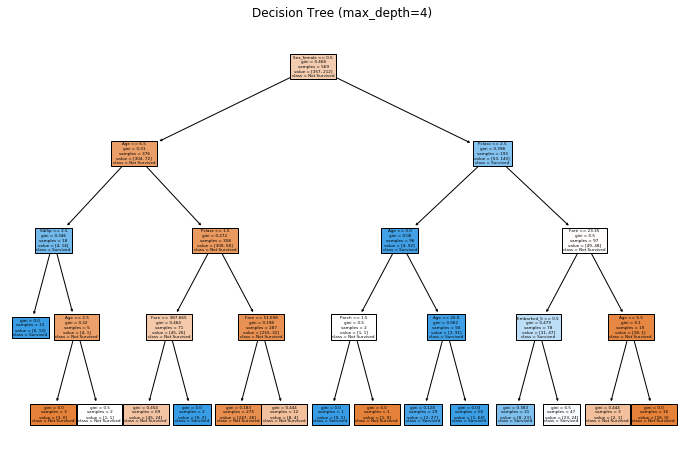

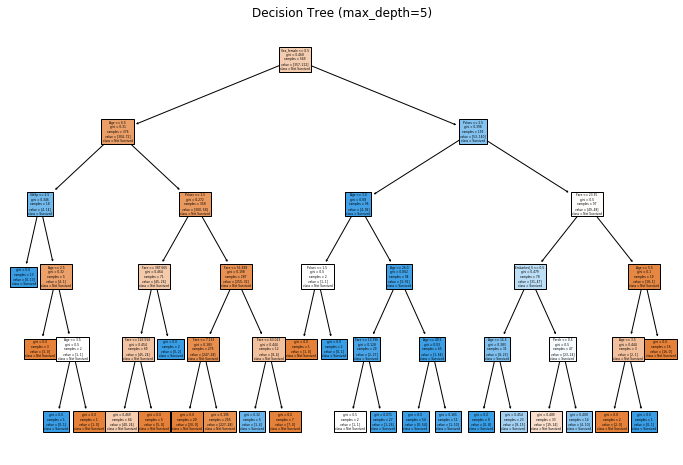

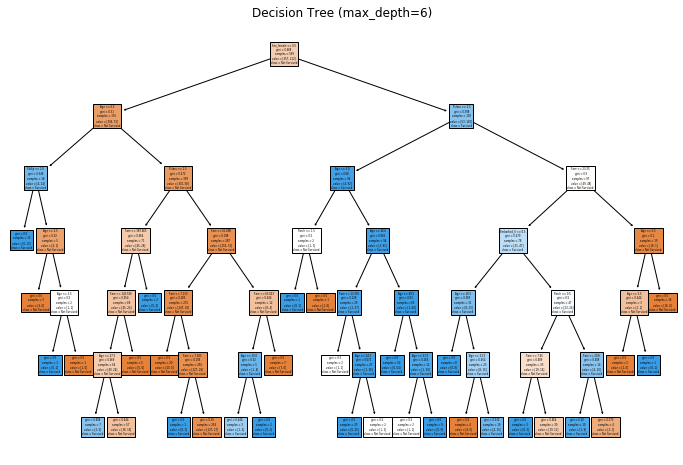

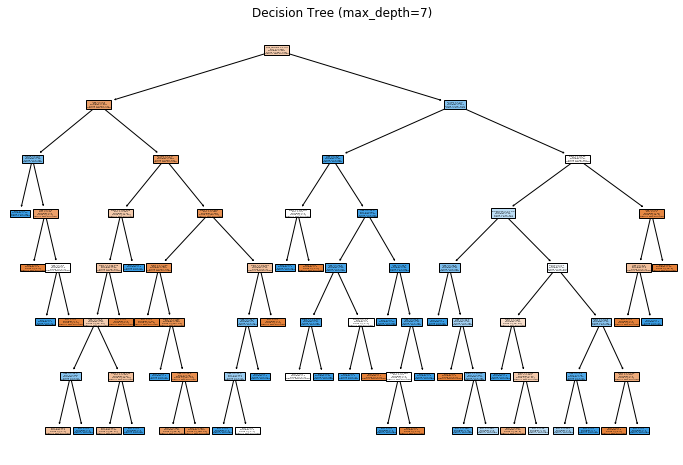

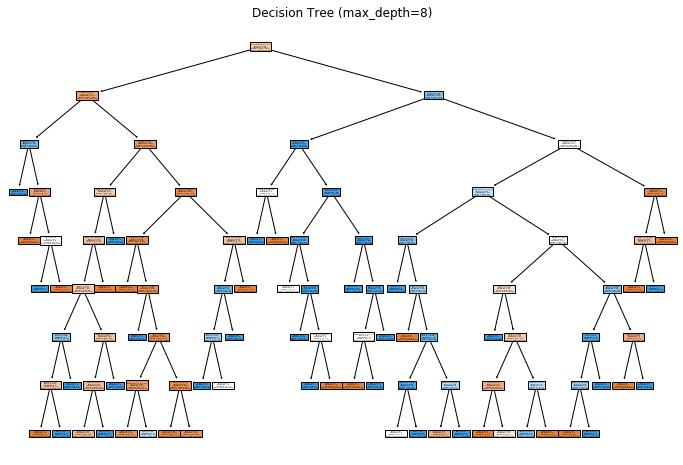

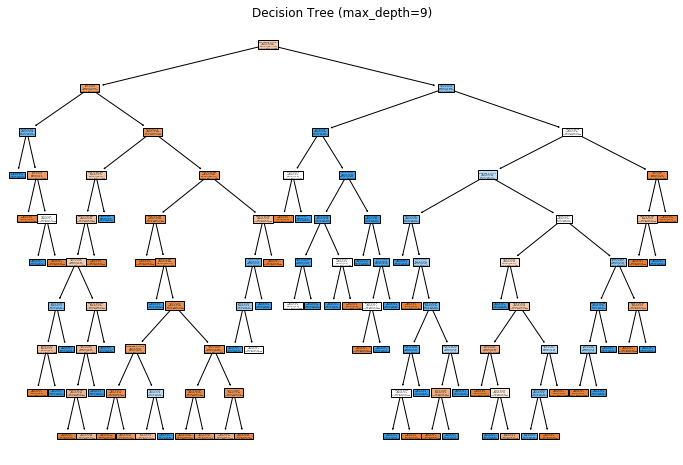

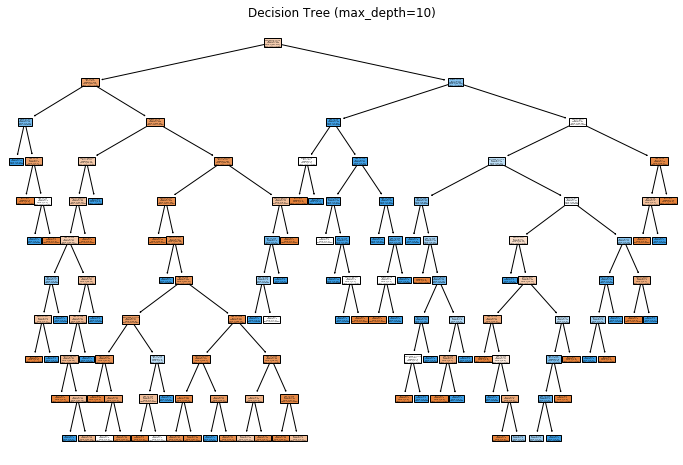

In [349]:
# Assign train accuracies lists
train_accuracies = []
# Assign development accuracies lists
dev_accuracies = []
# Assign a list of depths to iterate over
depths = list(range(2, 11))
# Create a figure for tree plots
tree_plots = {}
# Iterate over the depths
for depth in depths:
    # Create a Decision Tree Classifier with the current depth
    decision_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    # Fit the Decision Tree Classifier to the training data
    decision_tree.fit(X_train, y_train)
    # Predict the Decision Tree to the training data and calculate accuracy
    train_acc = accuracy_score(y_train, decision_tree.predict(X_train))
    # Predict the Decision Tree to the development data and calculate accuracy
    dev_acc = accuracy_score(y_dev, decision_tree.predict(X_dev))
    # Append the training accuracies to the list
    train_accuracies.append(train_acc)
    # Append the development accuracies to the list
    dev_accuracies.append(dev_acc)
    # Create a figure to plot the decision tree
    fig, ax = plt.subplots(figsize=(12, 8))
    # Plot the decision tree with the current depth
    plot_tree(decision_tree, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True, ax=ax)
    # Assign the title of the plot
    plt.title(f"Decision Tree (max_depth={depth})")
    # Create plots of each tree
    tree_plots[depth] = fig
# Display the accuracies of the training and development sets
(train_accuracies, dev_accuracies)

Plot a line of your training accuracies and another of your development accuracies in the same graph. Write down what shape the lines have and what this shape means.

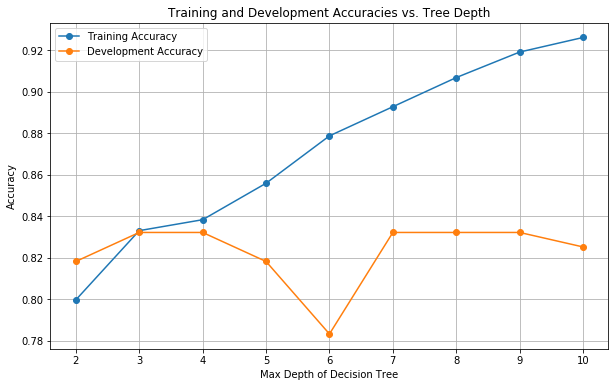

In [350]:
# Create a figure to plot training and development accuracies
plt.figure(figsize=(10, 6))
# Plot and label training accuracies
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
# Plot and label development accuracies
plt.plot(depths, dev_accuracies, label='Development Accuracy', marker='o')
# Assign the x-axis label to the depths
plt.xlabel('Max Depth of Decision Tree')
# Assign the y-axis label to the accuracies
plt.ylabel('Accuracy')
# Assign the title of the plot
plt.title('Training and Development Accuracies vs. Tree Depth')
# Assign the legend to the plot
plt.legend()
# Display the grid lines
plt.grid(True)
# Display the plot
plt.show()

Training accuracy indicates that the model performs well on the training data. It steadily increases as the maximum depth of the trees increases because deeper trees can memorise the training data more effectively. This is expected, as deeper trees tend to be more flexible and can capture more complex patterns.

Development accuracy improves from depth 2 to depth 3, indicating that the tree starts to identify meaningful patterns. At depths 3 and 4, development accuracy plateaus, suggesting that the model has successfully captured important patterns and has achieved a balance between bias and variance. However, from depth 4 onward, development accuracy begins to decline. This indicates that while the model fits the training data better, it is losing its ability to generalise to the development set, showing signs of potential overfitting despite ongoing improvements in training accuracy. Interestingly, development accuracy starts to improve again from depth 6. This suggests that the model is recovering from overfitting and is beginning to capture more complex and relevant patterns. Development accuracy levels off at depths 7, 8, and 9, implying that the model has reached a balance between bias and variance. At this stage, generalisation does not significantly improve or decline. Finally, development accuracy shows a slight decline, indicating that further increases in complexity may fail to help and harm generalisation.

The optimal depth appears to be around 7 or 8, where the model effectively captures complex and relevant patterns while maintaining high and stable development accuracy.

Report the accuracy of your final model on the test data

In [351]:
# Calculate accuracy of Decision Tree model on test set and dispplay it in percentage
print("Decision Tree Performance:", round(decision_tree.score(X_test, y_test), 4) * 100, "%")
# Display the depth of the tree
print("At depth:", decision_tree.tree_.max_depth)

Decision Tree Performance: 79.89 %
At depth: 10


The test accuracy is 79.88%, indicating that when tested on data that has not been seen before, it correctly predicted survival for approximately 80% of the passengers. This result is decent. However, not significantly better than the development accuracy at the optimal depth, which stands at 83.22%.

The tree has a maximum depth of 10, making it relatively complex. This complexity allows the model to make very detailed and possibly overfitted decisions. While the model performs reasonably well at this depth, it shows signs of slight overfitting, as the development accuracy declined at depth 9, and the test accuracy is a bit lower than the development accuracy at the optimal depth.

Create a Bagged, Random Forest, and Boosted tree for the titanic data set in the same way that you created a regular Classification Tree.

In [352]:
# Train Bagging Classifier
bagging_model = BaggingClassifier(random_state=42)
# Fit Bagging Classifier model to the training data
bagging_model.fit(X_train, y_train)
# Train Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
# Fit Random Forest Classifier model to the training data
random_forest_model.fit(X_train, y_train)
# Train  Gradient Boosting Classifier
boosting_model = GradientBoostingClassifier(random_state=42)
# Fit Gradient Boosting Classifier model to the training data
boosting_model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

From the Random Forest model, determine which of the features is the one that contributes the most to predicting whether a passenger survives or not.

In [353]:
# Get the importance of each feature from the trained Random Forest
importances = random_forest_model.feature_importances_
# Assign all X columns as features
features = X.columns
# Creates a DataFrame to view them neatly
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
# Arrange DataFrame in descending order
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
# Display the first  feature as most important for predicting survival
importance_df.head(1)

,Feature,Importance
1,Age,0.257437


Pick one of these methods, and tune the parameters n_estimators and max_depth.

In [354]:
# Train base Decision Tree with max depth of 8
base = DecisionTreeClassifier(max_depth=8)
# Fit Decision Tree model to the training data
base.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Report the accuracy of all models and report which model performed the best, including the values for n_estimators and max_depth that the best model had.

In [355]:
# Calculate accuracy of base Decision Tree model on test set and dispplay it in percentage
print("Accuracy base:", round(base.score(X_test, y_test), 3) * 100, "%")
# Create Bagging Ensemble using the earlier decision tree as the base estimator, using 100 estimators
ensemble_bagging = BaggingClassifier(base_estimator=base, n_estimators=100, random_state=42)
# Fit Bagging Ensemble to the training data
ensemble_bagging.fit(X_train,y_train)
# Calculate accuracy of Bagging Ensemble on test set and dispplay it in percentage
print("Bagging Accuracy:", round(ensemble_bagging.score(X_test, y_test), 3) * 100, "%")
# Create Random Forest Ensemble using 100 estimators
ensemble_random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit Random Ensemble to the training data
ensemble_random_forest.fit(X_train,y_train)
# Calculate accuracy of Random Ensemble on test set and dispplay it in percentage
print("Random Forest Accuracy:", round(ensemble_random_forest.score(X_test, y_test), 3) * 100, "%")
# Create Gradient Boosting Ensemble using 100 estimators
ensemble_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
# Fit Gradient Boosting Ensemble to the training data
ensemble_boosting.fit(X_train,y_train)
# Calculate accuracy of Gradient Boosting Ensemble on test set and dispplay it in percentage
print("Boosting Accuracy:", round(ensemble_boosting.score(X_test, y_test), 3) * 100, "%")

Accuracy base: 78.8 %
Bagging Accuracy: 83.2 %
Random Forest Accuracy: 81.0 %
Boosting Accuracy: 80.4 %


Bagged Tree has an accuracy of 83.2 % with n_estimators of 100 and max_depth of 8, which is the highest followed by Random Forest Tree with an accuracy of 81.0 %, then Boosted Tree with an accuracy of 80.4 % and lastly Decision Tree, which is a base with an accuracy of 78.2 %.

Bagged Tree model has the highest accuracy as it reduces variance by averaging diverse models, which reduces overfitting compared to a single tree and is more stable and robust than Random Forest and Boosted Tree.